In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [11]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [12]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 10
)

feature_generator_kargs = {
    "operations": [add, sub, mul, div, hyp, log],
    "operation_names": ["+", "-", "*", "/", "hyp", "log"],
    "popsize": 120,
    "maxiter": 200,
    "mutation_rate": 0.05,
    "max_tree_depth": 8
}

In [13]:
dataset = pd.read_csv("csv/insurance.csv")
dataset.dropna(inplace=True)
# Change a column values to not be categorical
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
dataset['sex'] = dataset['sex'].map({'male':0, 'female':1})
dataset['smoker'] = dataset['smoker'].map({'yes':1, 'no':0})
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [14]:
tester = tester(X, y, feature_generator_kargs, 5, 2, 500, verbose = True, test_size = 0.3, random_state = 17)

In [15]:
tester.test_models(nodatatests = 5, notests=20)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.6996890737502455 Generation best 0.6602548590787269
Split:  1 Feature:  1
Iteration:  199 Best fitness:  0.10306680120352663 Generation best 0.09149267428534902
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.683978394963086 Generation best 0.6572825684973724
Split:  1 Feature:  3
Iteration:  199 Best fitness:  0.11721600014610334 Generation best 0.09568401492080736
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.7080306634463047 Generation best 0.6980043191810905
Iteration 4 - MSE 0.14137884337731296, R2 0.8346736185769732, MAE 0.21093114133656474, NEW_MSE 0.14019369735777384, NEW_R2 0.8360595112479535, NEW_MAE 0.20371721578954216
Iteration 9 - MSE 0.13835873298811885, R2 0.8382052921302148, MAE 0.21024686475248408, NEW_MSE 0.13975618969727008, NEW_R2 0.8365711263993303, NEW_MAE 0.20458624632190878
Iteration 14 - MSE 0.14029903054655027, R2 0.8359363361354109, MAE 0.21107370993989943, NEW_MSE 0.1390250529561961, NEW_

In [16]:
import os

# create forlder insuranse

if not os.path.exists("results/insurance"):
    os.makedirs("results/insurance")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/insurance/" + key + ".csv")

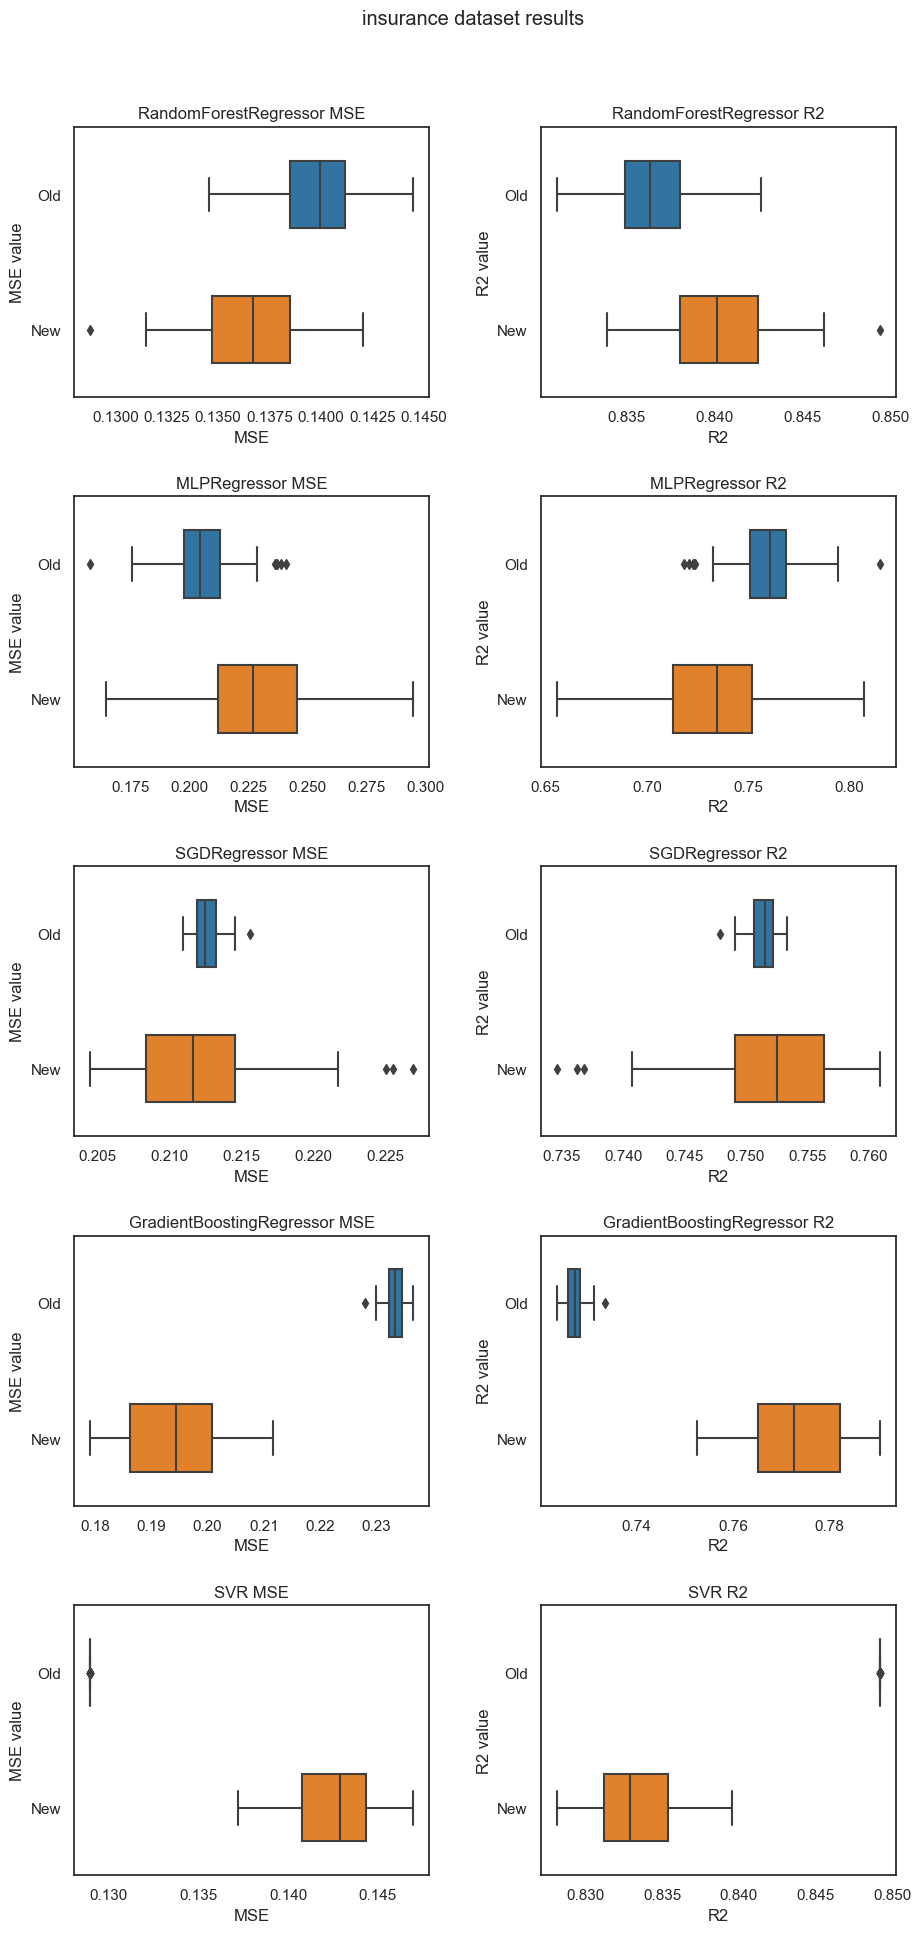

In [17]:
tests = tester.get_individual_tests()

from makeplots import make_boxplots

make_boxplots(tests, "insurance")

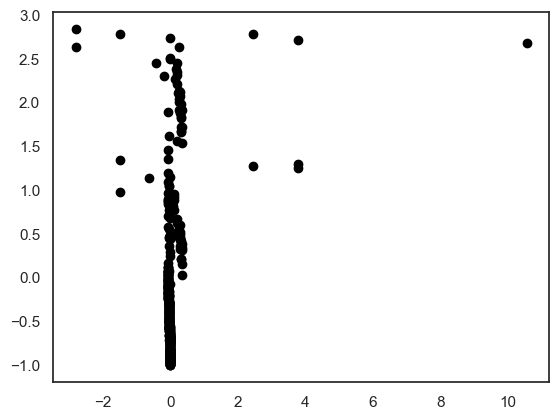

Min:  -2.793872277659298 Max:  10.558928922091347 Mean:  0.051046399123649264 Std:  0.6918450054922236


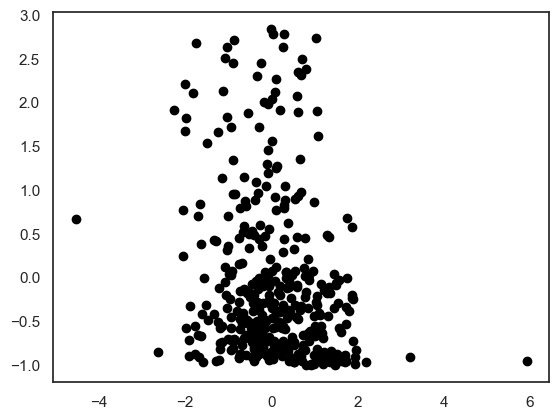

Min:  -4.532358916004044 Max:  5.929870343395578 Mean:  0.034029011659865875 Std:  1.0090943210039598


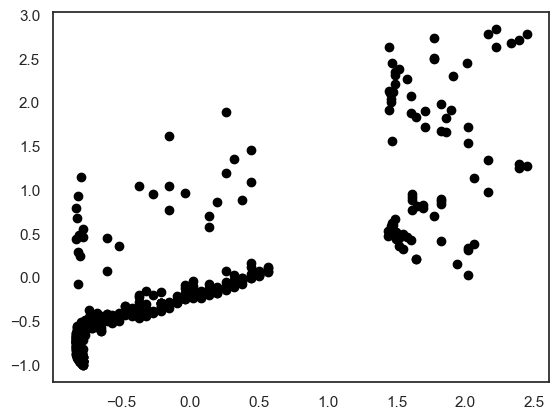

Min:  -0.8319235207819192 Max:  2.4442838083736667 Mean:  -0.05129907641498229 Std:  0.9712192405576093


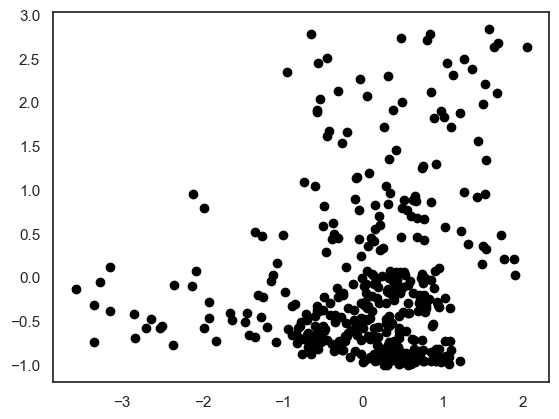

Min:  -3.579794433563489 Max:  2.05246761771403 Mean:  0.0724547550011644 Std:  0.9228965743495712


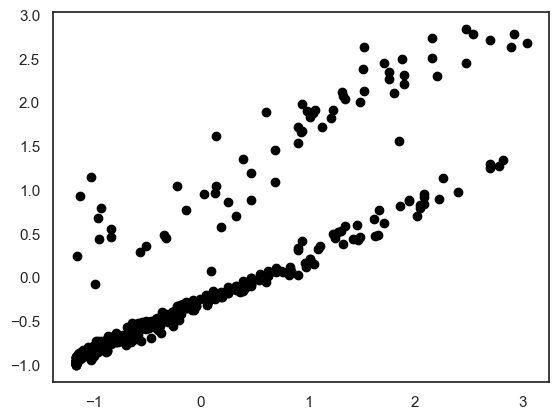

Min:  -1.1693009311519167 Max:  3.042142333750091 Mean:  -0.035300059063999516 Std:  1.0178755610657804


In [18]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())